# Imports

In [1]:
## This script is used to set the default font type to be Type 42 for gecco
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [103]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns

# Data Reading

## BehaviorSpace Data

In [57]:
def read_all_bspace_data(file_path):
    all_files = glob.glob(file_path+"*.csv")
    li = []
    for filename in all_files:
        exp_name = filename.split()[-1].removesuffix("-exp-table.csv")
        print(exp_name)
        df = read_bspace_data(filename, header_row=6)
        df['exp_name'] = exp_name
        li.append(df)
    return pd.concat(li, axis=0, ignore_index=True)

In [58]:
def read_bspace_data(filename, header_row=6):
    df = pd.read_csv(filename, header=header_row, index_col=0)
    return df

In [127]:
file_path = "../../Logs/output_data/collection_simple_prompt_exp/"
data = read_all_bspace_data(file_path)

zero-shot-code
one-shot-code
two-shot-code


In [7]:
file_path = "../../Logs/output_data/simple-collection-env one-shot-code-exp-table.csv"
data = read_bspace_data(file_path)

In [21]:
file_path = "../../Logs/output_data/simple-collection-env two-shot-code-exp-table.csv"
data = read_bspace_data(file_path)

## JSON Log Data

In [116]:
def read_all_json_data(dirpath, filename):
    li = []
    subfolders = [ f.path for f in os.scandir(dirpath) if f.is_dir() ]
    for subdir in subfolders:
        exp_name = subdir.split("/")[-1]
        print(exp_name)
        df = read_json_files(subdir, filename)
        df["exp_name"] = exp_name
        li.append(df)
    return pd.concat(li, axis=0, ignore_index=True)

In [89]:
def read_json_files(dirpath, filename):
    dflist = []
    result_files = glob.glob(dirpath+filename, recursive=True)
    for f in result_files:
        print(f)
        df = pd.read_json(f)
        dflist.append(df)
    return pd.concat(dflist, axis=0, ignore_index=True)

In [120]:
dirpath = "../../Logs/log_data/collection_simple_prompt_exp/"
filename = "/**/generation_output.json"
data = read_all_json_data(dirpath, filename)

one_shot_code_exp
../../Logs/log_data/collection_simple_prompt_exp/one_shot_code_exp/2025-03-21_09-08-34/generation_output.json
../../Logs/log_data/collection_simple_prompt_exp/one_shot_code_exp/2025-03-21_15-26-26/generation_output.json
../../Logs/log_data/collection_simple_prompt_exp/one_shot_code_exp/2025-03-21_06-12-36/generation_output.json
../../Logs/log_data/collection_simple_prompt_exp/one_shot_code_exp/2025-03-21_12-17-25/generation_output.json
../../Logs/log_data/collection_simple_prompt_exp/one_shot_code_exp/2025-03-21_17-54-04/generation_output.json
two_shot_code_exp_groq
../../Logs/log_data/collection_simple_prompt_exp/two_shot_code_exp_groq/2025-03-21_22-59-25/generation_output.json
../../Logs/log_data/collection_simple_prompt_exp/two_shot_code_exp_groq/2025-03-21_22-59-24/generation_output.json
../../Logs/log_data/collection_simple_prompt_exp/two_shot_code_exp_groq/2025-03-21_23-21-40/generation_output.json
../../Logs/log_data/collection_simple_prompt_exp/two_shot_code_e

In [97]:
dirpath = "../../Logs/one_shot_code_exp/"
filename = "/**/generation_output.json"
data = read_json_files(dirpath, filename)

../../Logs/one_shot_code_exp/2025-03-21_09-08-34/generation_output.json
../../Logs/one_shot_code_exp/2025-03-21_15-26-26/generation_output.json
../../Logs/one_shot_code_exp/2025-03-21_06-12-36/generation_output.json
../../Logs/one_shot_code_exp/2025-03-21_12-17-25/generation_output.json
../../Logs/one_shot_code_exp/2025-03-21_17-54-04/generation_output.json


# Plotting Functions

In [11]:
axes_style = {
    "axes.grid": True,
    #'grid.linestyle': '--',
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.0
}

In [128]:
def plot_fitness(data,metric="mean-fitness"):
    sns.set_theme(style="whitegrid",rc=axes_style)
    ax = sns.lineplot(x="generation", y=metric, hue="exp_name", 
                      markers=True, dashes=False, errorbar=('ci', 95), legend="full", data=data)
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.set_xlim(0, 300)
    ax.set_ylim(0)
    #ax.set_xticklabels(ax.get_xticklabels())
    ax.legend(title="Prompt")
    # leg = ax.axes.get_legend()
    # new_labels = ["One Shot", "Two Shot"]
    # for t, l in zip(leg.texts, new_labels):
    #     t.set_text(l)
    ax.figure.show()
    return ax

/var/folders/4n/nypqf8ks78d_d4x427316gfc0000gq/T/ipykernel_37928/1806991432.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


<Axes: xlabel='Generation', ylabel='Fitness'>

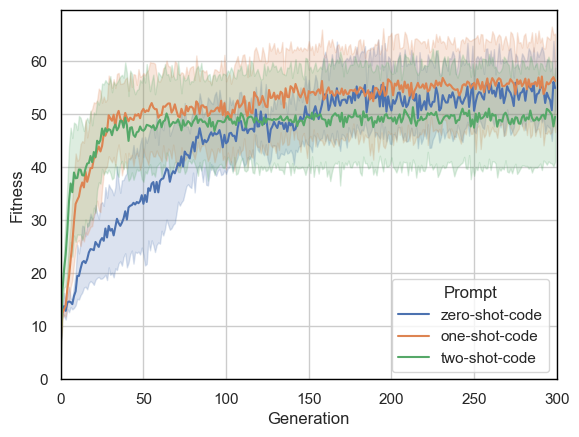

In [129]:
plot_fitness(data)

/var/folders/4n/nypqf8ks78d_d4x427316gfc0000gq/T/ipykernel_37928/1806991432.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


<Axes: xlabel='Generation', ylabel='Fitness'>

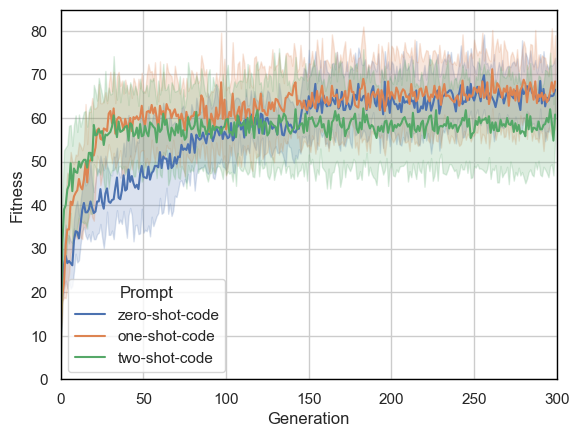

In [130]:
plot_fitness(data,metric="max [fitness] of llm-agents")

/var/folders/4n/nypqf8ks78d_d4x427316gfc0000gq/T/ipykernel_37928/1806991432.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


<Axes: xlabel='Generation', ylabel='Fitness'>

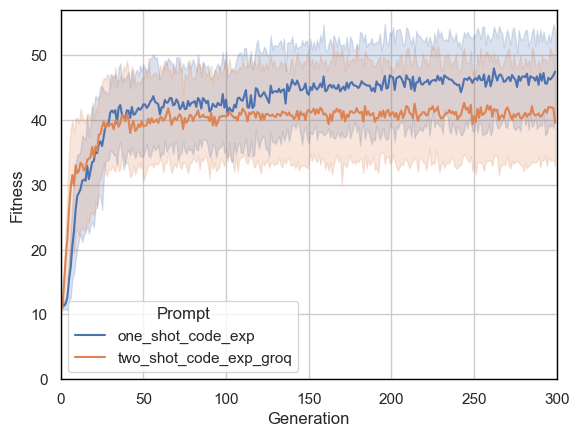

In [125]:
plot_fitness(data, metric="mean fitness")

/var/folders/4n/nypqf8ks78d_d4x427316gfc0000gq/T/ipykernel_37928/1806991432.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


<Axes: xlabel='Generation', ylabel='Fitness'>

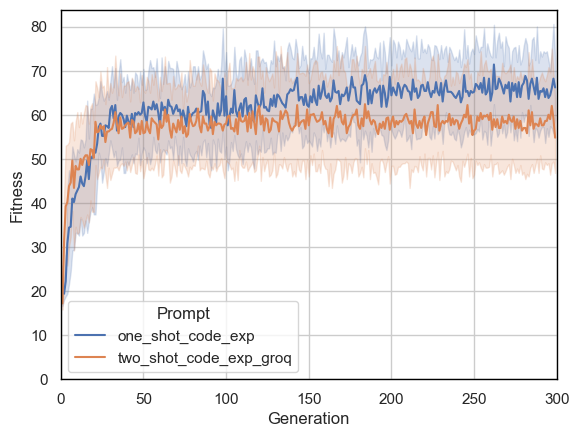

In [126]:
plot_fitness(data, metric="best fitness")